In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingModel import VotingModel
from model.EvalMetrics import EvalMetrics

# Add the directory containing the VotingModel to the Python path

from model.VotingRules import VotingRules

# Initialize simulation parameters
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
num_rounds = 100
voter_type = 'mallows_model'
quorum=17
# Initialize the model
model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Initialize the evaluation metrics
model.step()
eval_metrics = EvalMetrics(model)
output_dir = '/Users/idrees/Code/govxs/data/simulation_data'
allocation_df=model.compile_fund_allocations()
allocation_df.to_csv(os.path.join(output_dir, 'allocation_df.csv'), index=False)
allocation_df

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


,majoritarian_moving_phantoms,r1_quadratic,r2_mean,r3_median,r4_capped_median,Project
0,3.676955,3.225418,3.782116,4.061655,3.825530,Project 1
1,1.795107,2.225425,1.903047,1.858399,2.142215,Project 2
2,1.593030,2.136605,1.749906,1.426057,1.643846,Project 3
3,3.805388,3.127466,3.538144,3.715866,3.769850,Project 4
4,1.829703,2.136563,1.688034,1.892505,2.181530,Project 5
5,1.362732,1.696768,1.175096,1.192882,1.375060,Project 6
6,3.344522,3.044370,3.346945,3.631302,3.825530,Project 7
7,2.551843,2.861543,3.118236,2.821730,3.252667,Project 8
8,1.445288,1.644624,1.199170,1.073805,1.237798,Project 9
9,1.593030,2.008543,1.653572,1.083628,1.249121,Project 10


# Evaluate Egalitarian Score

In [3]:
egalitarian_results=eval_metrics.evaluate_egalitarian_score(num_rounds)
egalitarian_results.to_csv(os.path.join(output_dir, 'egalitarian_results.csv'), index=False)
egalitarian_results

KeyboardInterrupt: 

In [ ]:
egalitarian_results.describe()

,round,majoritarian_moving_phantoms_egalitarian_score,r1_quadratic_egalitarian_score,r2_mean_egalitarian_score,r3_median_egalitarian_score,r4_capped_median_egalitarian_score
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,50.500000,2.339490e+07,2.345827e+07,2.344917e+07,2.349314e+07,2.349314e+07
std,29.011492,2.493186e+05,2.338824e+05,2.399579e+05,2.577597e+05,2.577597e+05
min,1.000000,2.281475e+07,2.295343e+07,2.281935e+07,2.294059e+07,2.294059e+07
25%,25.750000,2.321964e+07,2.326404e+07,2.328378e+07,2.328052e+07,2.328052e+07
50%,50.500000,2.338629e+07,2.345425e+07,2.344416e+07,2.349280e+07,2.349280e+07
75%,75.250000,2.355262e+07,2.363072e+07,2.362559e+07,2.366336e+07,2.366336e+07
max,100.000000,2.400175e+07,2.402635e+07,2.396986e+07,2.424128e+07,2.424128e+07


# Evaluate Gini Index

In [ ]:
gini_results,allocations = eval_metrics.evaluate_gini_index(num_rounds)
gini_results.to_csv(os.path.join(output_dir, 'gini_results.csv'), index=False)
print("Gini Index Results:")
gini_results.head(100)

Gini Index Results:


,round,majoritarian_moving_phantoms_gini_index,r1_quadratic_gini_index,r2_mean_gini_index,r3_median_gini_index,r4_capped_median_gini_index
0,1,0.064949,0.027784,0.053678,0.078826,0.078826
1,2,0.061109,0.026616,0.053054,0.074604,0.074604
2,3,0.071789,0.030621,0.058857,0.084318,0.084318
3,4,0.066169,0.028565,0.056115,0.081052,0.081052
4,5,0.064368,0.026653,0.051320,0.078794,0.078794
...,...,...,...,...,...,...
95,96,0.065028,0.027460,0.053376,0.077871,0.077871
96,97,0.066569,0.027792,0.054670,0.080742,0.080742
97,98,0.065820,0.027489,0.054432,0.077525,0.077525
98,99,0.065271,0.026835,0.051503,0.077159,0.077159


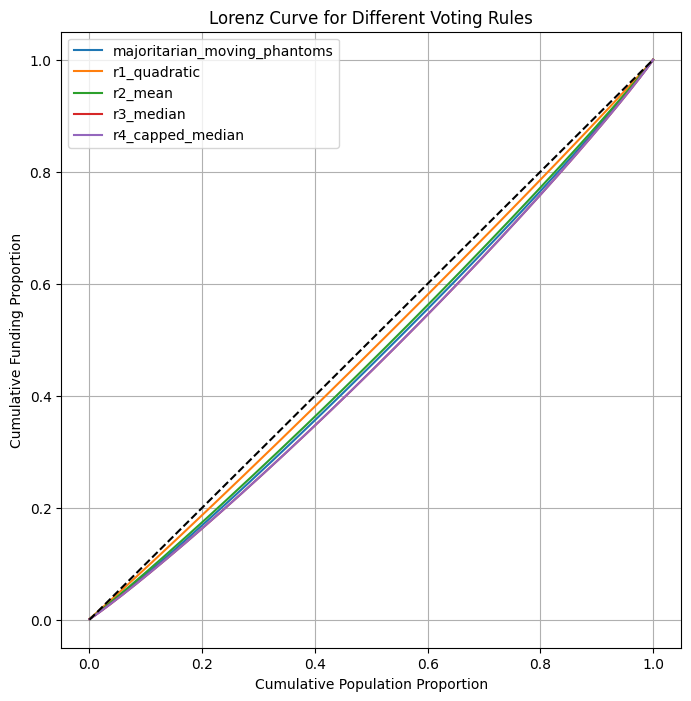

In [ ]:
import matplotlib.pyplot as plt
def plot_lorenz_curve(averaged_cumulative_allocations):
        plt.figure(figsize=(8, 8))
        
        for voting_rule, lorenz_values in averaged_cumulative_allocations.items():
            # Lorenz curve starts at (0,0)
            plt.plot(np.linspace(0, 1, len(lorenz_values)), lorenz_values, label=voting_rule)
        
        # Line of equality
        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        
        plt.xlabel('Cumulative Population Proportion')
        plt.ylabel('Cumulative Funding Proportion')
        plt.title('Lorenz Curve for Different Voting Rules')
        plt.legend()
        plt.grid(True)
        plt.show()
plot_lorenz_curve(allocations)

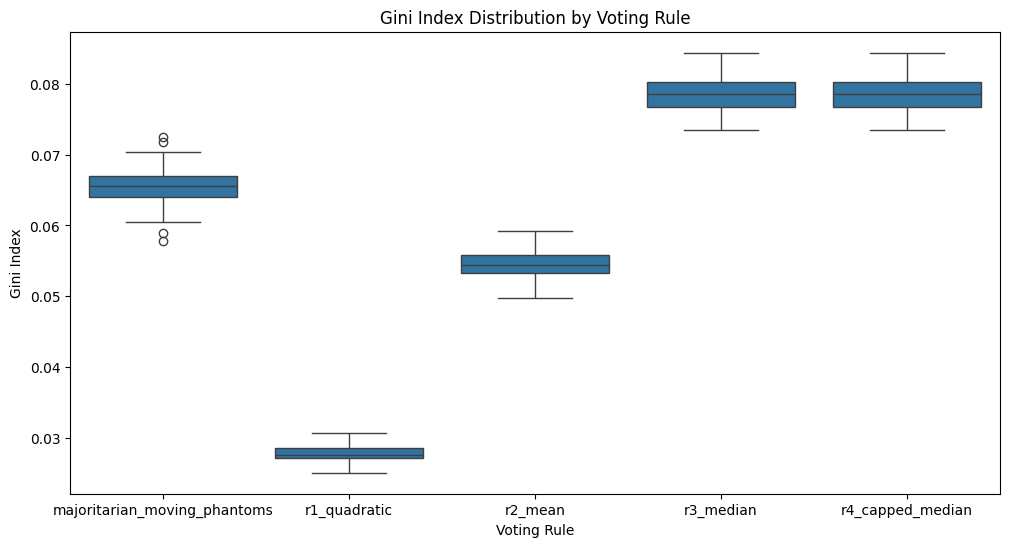

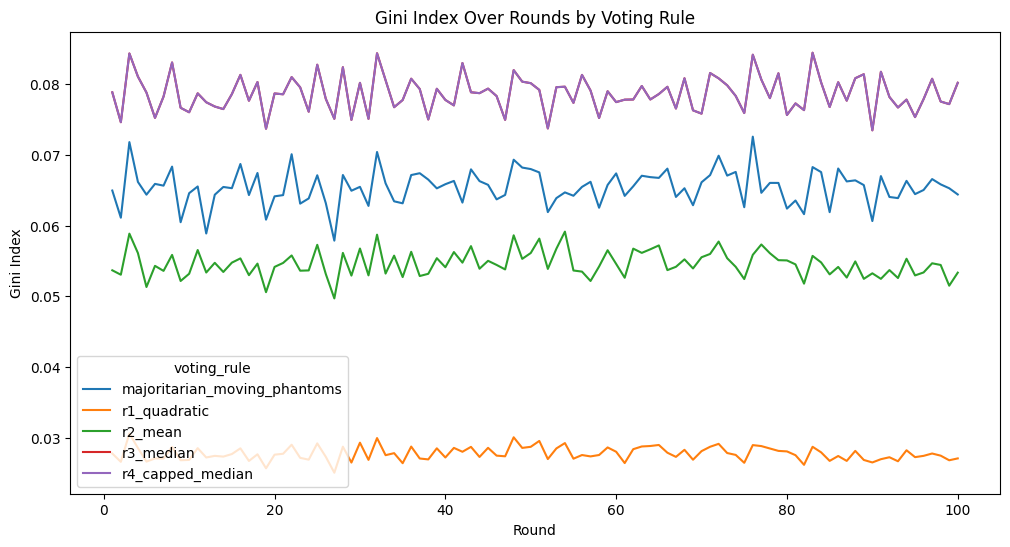

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for box plot
gini_results_long = gini_results.melt(id_vars=['round'], var_name='voting_rule', value_name='gini_index')
gini_results_long['voting_rule'] = gini_results_long['voting_rule'].str.replace('_gini_index', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='gini_index', data=gini_results_long)
plt.title('Gini Index Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Gini Index')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='gini_index', hue='voting_rule', data=gini_results_long)
plt.title('Gini Index Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Gini Index')
plt.show()


# Evaluate Alignment with Ground Truth

In [ ]:
alignment_results = eval_metrics.evaluate_alignment(num_rounds)
alignment_results.to_csv(os.path.join(output_dir, 'alignment_results.csv'), index=False)
print("Alignment Results:")
alignment_results.head(100)

Alignment Results:


,round,majoritarian_moving_phantoms_l1_distance,r1_quadratic_l1_distance,r2_mean_l1_distance,r3_median_l1_distance,r4_capped_median_l1_distance
0,1,2.957766e+06,1.330536e+06,2.578689e+06,3.494662e+06,3.494662e+06
1,2,2.765213e+06,1.283209e+06,2.471893e+06,3.483674e+06,3.483674e+06
2,3,3.141228e+06,1.332601e+06,2.499446e+06,3.604614e+06,3.604614e+06
3,4,2.685907e+06,1.167559e+06,2.283254e+06,3.276046e+06,3.276046e+06
4,5,2.825401e+06,1.242974e+06,2.344150e+06,3.476853e+06,3.476853e+06
...,...,...,...,...,...,...
95,96,2.761947e+06,1.269888e+06,2.369245e+06,3.372653e+06,3.372653e+06
96,97,3.016622e+06,1.308606e+06,2.485503e+06,3.461325e+06,3.461325e+06
97,98,2.853584e+06,1.183450e+06,2.237045e+06,3.151357e+06,3.151357e+06
98,99,2.900167e+06,1.298912e+06,2.431852e+06,3.549491e+06,3.549491e+06


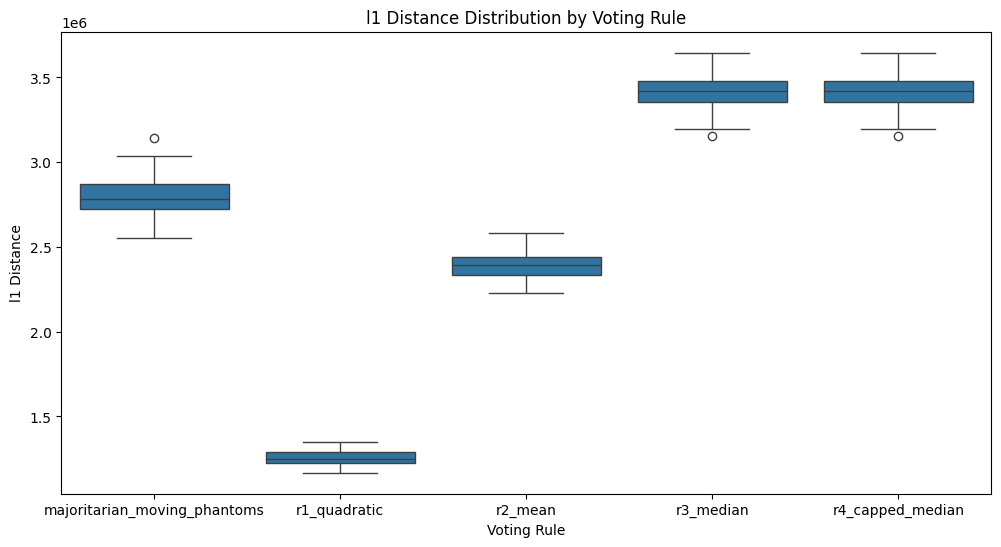

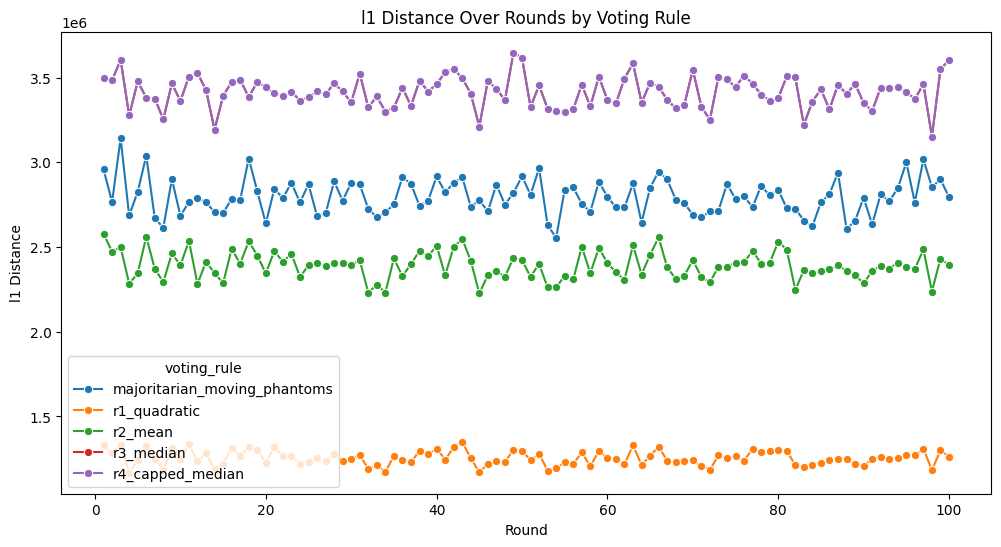

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
alignment_results_long = alignment_results.melt(id_vars=['round'], var_name='voting_rule', value_name='l1_distance')
alignment_results_long['voting_rule'] = alignment_results_long['voting_rule'].str.replace('_l1_distance', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='l1_distance', data=alignment_results_long)
plt.title('l1 Distance Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('l1 Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='l1_distance', hue='voting_rule', data=alignment_results_long, marker='o')
plt.title('l1 Distance Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('l1 Distance')
plt.show()


In [ ]:
def calculate_alignment_metrics(alignment_results):
    metrics = {
        "voting_rule": [],
        "mean_l1_distance": [],
        "std_l1_distance": [],
        "min_l1_distance": [],
        "max_l1_distance": []
    }
    
    for voting_rule in model.voting_rules.keys():
        l1_distances = alignment_results[f"{voting_rule}_l1_distance"]
        metrics["voting_rule"].append(voting_rule)
        metrics["mean_l1_distance"].append(np.mean(l1_distances))
        metrics["std_l1_distance"].append(np.std(l1_distances))
        metrics["min_l1_distance"].append(np.min(l1_distances))
        metrics["max_l1_distance"].append(np.max(l1_distances))
    
    return pd.DataFrame(metrics)

# Calculate metrics
alignment_metrics = calculate_alignment_metrics(alignment_results)

alignment_metrics


,voting_rule,mean_l1_distance,std_l1_distance,min_l1_distance,max_l1_distance
0,majoritarian_moving_phantoms,2.794142e+06,105270.965566,2.554905e+06,3.141228e+06
1,r1_quadratic,1.254727e+06,42644.283051,1.167559e+06,1.348932e+06
2,r2_mean,2.390020e+06,81067.668601,2.225813e+06,2.578689e+06
3,r3_median,3.414659e+06,93766.945578,3.151357e+06,3.646425e+06
4,r4_capped_median,3.414659e+06,93766.945578,3.151357e+06,3.646425e+06


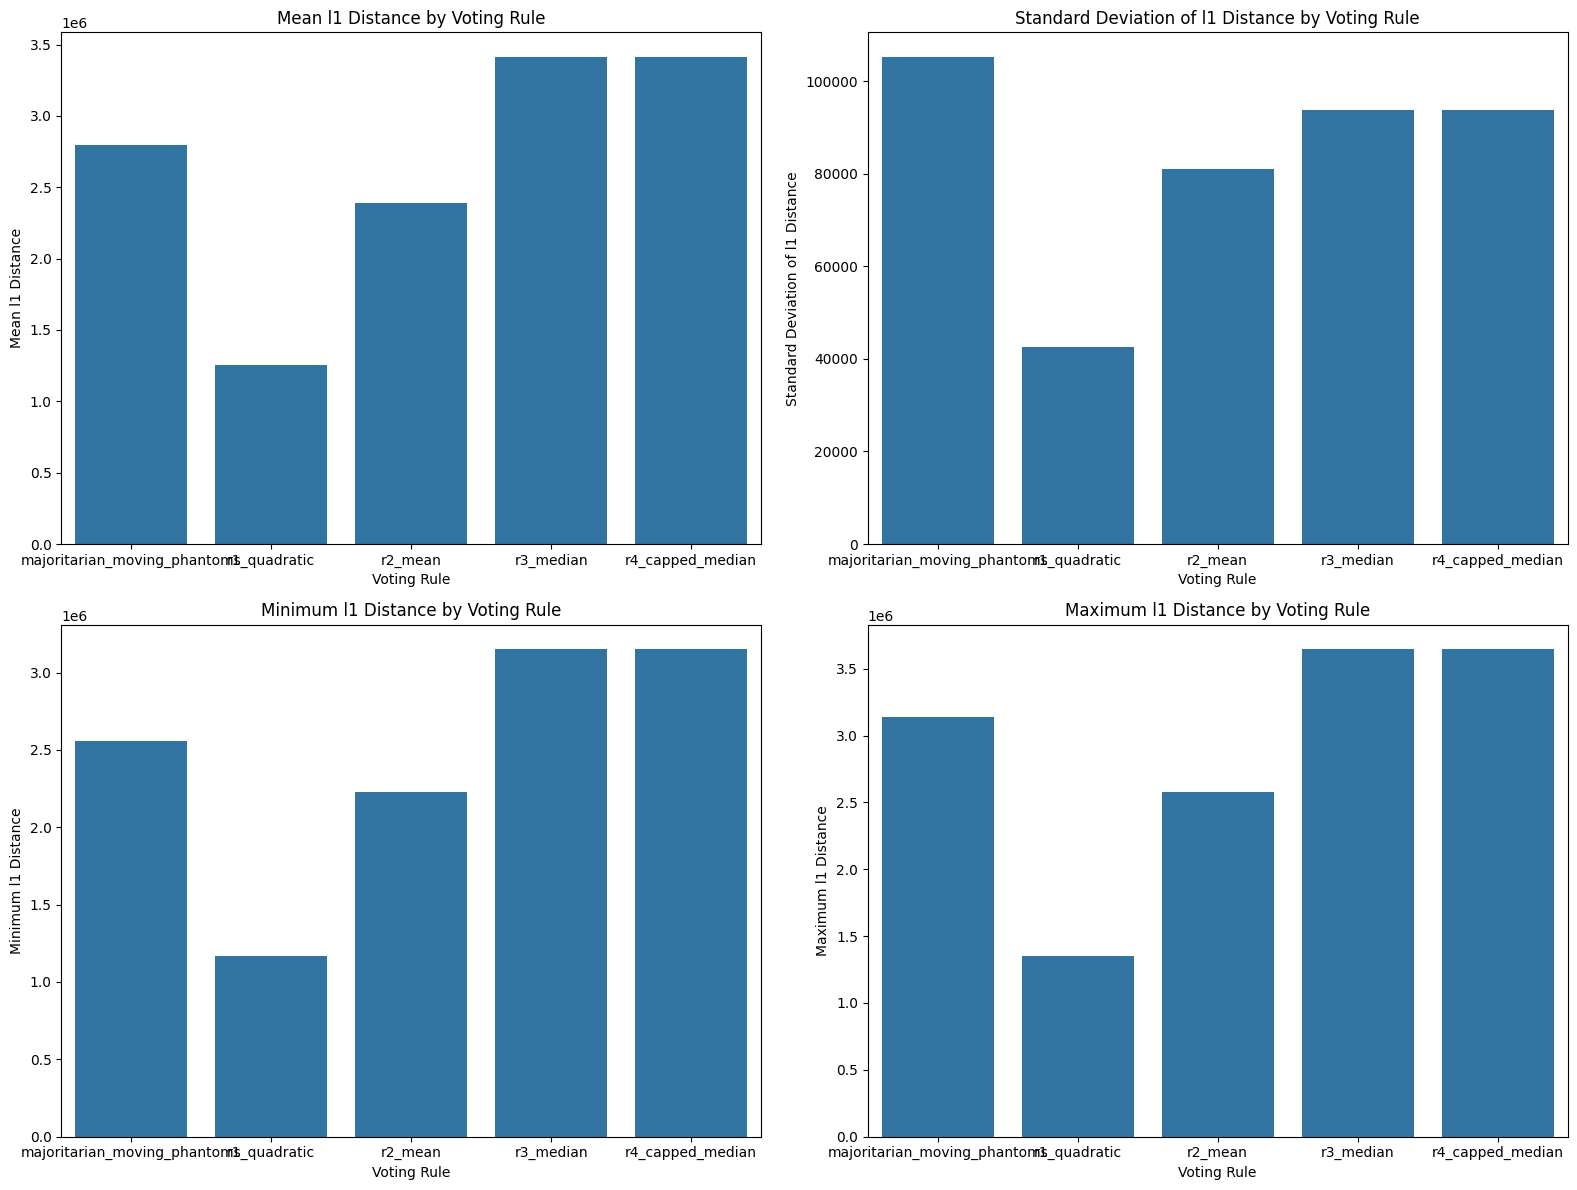

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean l1 Distance
sns.barplot(x='voting_rule', y='mean_l1_distance', data=alignment_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean l1 Distance by Voting Rule')
axes[0, 0].set_xlabel('Voting Rule')
axes[0, 0].set_ylabel('Mean l1 Distance')

# Standard Deviation of l1 Distance
sns.barplot(x='voting_rule', y='std_l1_distance', data=alignment_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Standard Deviation of l1 Distance by Voting Rule')
axes[0, 1].set_xlabel('Voting Rule')
axes[0, 1].set_ylabel('Standard Deviation of l1 Distance')

# Minimum l1 Distance
sns.barplot(x='voting_rule', y='min_l1_distance', data=alignment_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Minimum l1 Distance by Voting Rule')
axes[1, 0].set_xlabel('Voting Rule')
axes[1, 0].set_ylabel('Minimum l1 Distance')

# Maximum l1 Distance
sns.barplot(x='voting_rule', y='max_l1_distance', data=alignment_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Maximum l1 Distance by Voting Rule')
axes[1, 1].set_xlabel('Voting Rule')
axes[1, 1].set_ylabel('Maximum l1 Distance')

plt.tight_layout()
plt.show()


# Evaluate Social Welfare

In [ ]:
social_welfare_results = eval_metrics.evaluate_social_welfare(num_rounds)
social_welfare_results.to_csv(os.path.join(output_dir, 'social_welfare_results.csv'), index=False)
print("Social Welfare Results:")
social_welfare_results.head(100)

Social Welfare Results:


,round,majoritarian_moving_phantoms_social_welfare_avg_l1_distance,r1_quadratic_social_welfare_avg_l1_distance,r2_mean_social_welfare_avg_l1_distance,r3_median_social_welfare_avg_l1_distance,r4_capped_median_social_welfare_avg_l1_distance
0,1,2.177359e+07,2.187186e+07,2.185184e+07,2.186538e+07,2.186538e+07
1,2,2.190856e+07,2.200467e+07,2.199132e+07,2.199814e+07,2.199814e+07
2,3,2.189766e+07,2.199252e+07,2.197396e+07,2.198712e+07,2.198712e+07
3,4,2.192631e+07,2.201583e+07,2.200222e+07,2.202437e+07,2.202437e+07
4,5,2.185919e+07,2.195679e+07,2.194081e+07,2.195111e+07,2.195111e+07
...,...,...,...,...,...,...
95,96,2.178226e+07,2.188375e+07,2.186285e+07,2.186975e+07,2.186975e+07
96,97,2.180391e+07,2.189888e+07,2.188028e+07,2.189268e+07,2.189268e+07
97,98,2.177856e+07,2.188196e+07,2.185204e+07,2.187590e+07,2.187590e+07
98,99,2.184607e+07,2.194472e+07,2.192691e+07,2.193424e+07,2.193424e+07


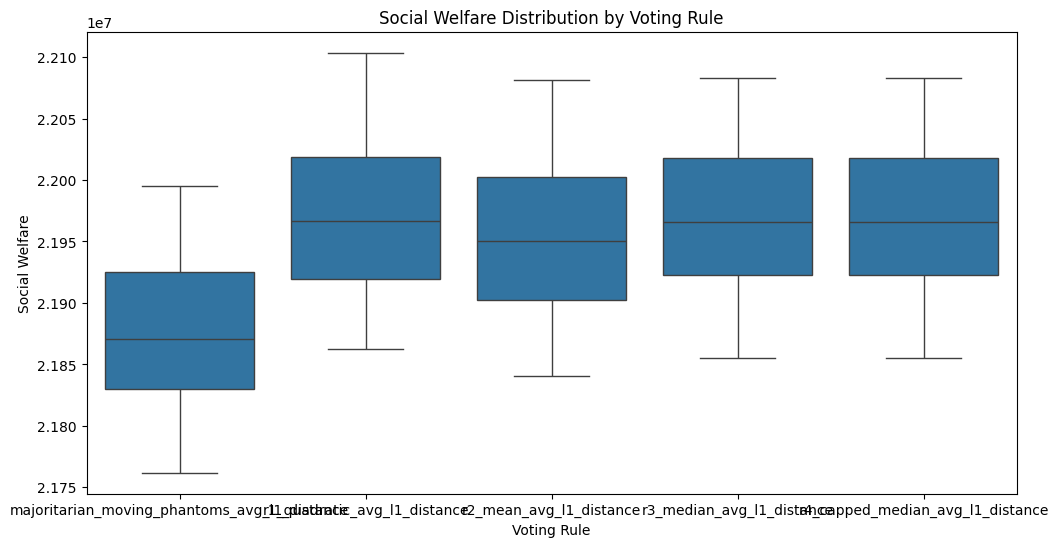

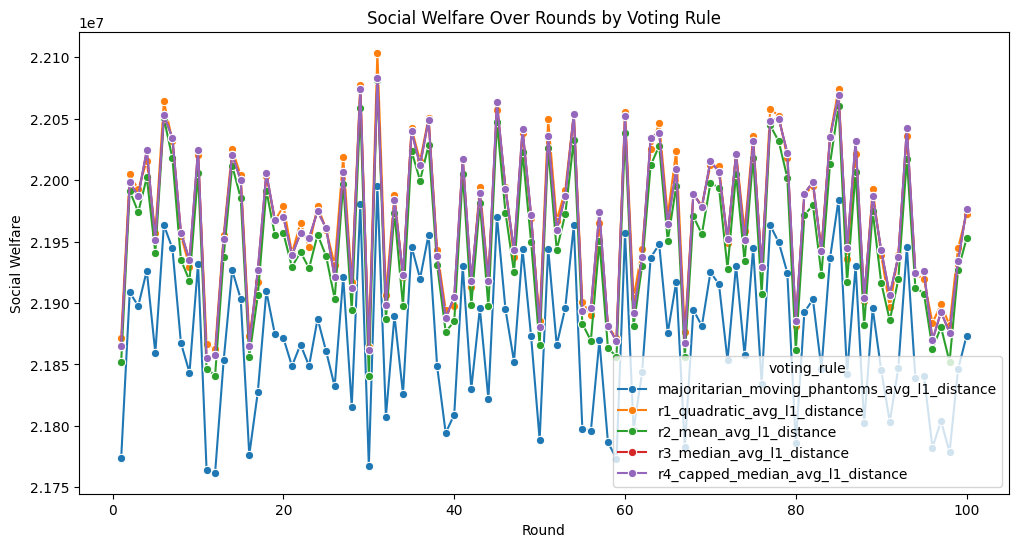

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
social_welfare_results_long = social_welfare_results.melt(id_vars=['round'], var_name='voting_rule', value_name='social_welfare')
social_welfare_results_long['voting_rule'] = social_welfare_results_long['voting_rule'].str.replace('_social_welfare', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='social_welfare', data=social_welfare_results_long)
plt.title('Social Welfare Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Social Welfare')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='social_welfare', hue='voting_rule', data=social_welfare_results_long, marker='o')
plt.title('Social Welfare Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Social Welfare')
plt.show()


# Evaluate Resistance to Control

In [20]:
control_results_constant_desired_increase = eval_metrics.evaluate_control(num_rounds)
control_results_constant_desired_increase.to_csv(os.path.join(output_dir, 'control_results_constant_desired_increase.csv'), index=False)
print("Control Results:")
control_results_constant_desired_increase.head(100)

Voting Rule: majoritarian_moving_phantoms: Original Funds for Project 0: 3.540739396221154
Voting Rule: majoritarian_moving_phantoms: Target Funds for Project 0: 4.248887275465385
Voting Rule: majoritarian_moving_phantoms: Original Funds for Project 1: 1.474875276326497
Voting Rule: majoritarian_moving_phantoms: Target Funds for Project 1: 1.7698503315917964
Voting Rule: majoritarian_moving_phantoms: Original Funds for Project 2: 2.0514595973599348
Voting Rule: majoritarian_moving_phantoms: Target Funds for Project 2: 2.4617515168319217
Voting Rule: majoritarian_moving_phantoms: Original Funds for Project 3: 1.8825355750614703
Voting Rule: majoritarian_moving_phantoms: Target Funds for Project 3: 2.2590426900737643
Voting Rule: majoritarian_moving_phantoms: Original Funds for Project 4: 1.3743156007499764
Voting Rule: majoritarian_moving_phantoms: Target Funds for Project 4: 1.6491787208999715
Voting Rule: majoritarian_moving_phantoms: Original Funds for Project 5: 1.487047802983381
Vo

,round,desired_increase,majoritarian_moving_phantoms_min_removal_cost,majoritarian_moving_phantoms_min_addition_cost,r1_quadratic_min_removal_cost,r1_quadratic_min_addition_cost,r2_mean_min_removal_cost,r2_mean_min_addition_cost,r3_median_min_removal_cost,r3_median_min_addition_cost,r4_capped_median_min_removal_cost,r4_capped_median_min_addition_cost
0,1,20,2,2,4,1,3,1,2,2,2,2
1,2,20,1,1,3,1,2,1,2,2,2,2
2,3,20,1,1,3,1,2,1,1,1,1,1
3,4,20,1,1,4,1,3,1,1,1,1,1
4,5,20,2,1,2,1,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,20,1,1,4,1,3,1,2,2,2,2
96,97,20,1,1,3,1,2,1,1,1,1,1
97,98,20,2,2,3,1,2,1,1,1,1,1
98,99,20,1,1,4,1,3,1,2,2,2,1


# Evaluate Robustness

In [ ]:
robustness_results = eval_metrics.evaluate_robustness(num_rounds)
robustness_results.to_csv(os.path.join(output_dir,'robustness_results.csv'), index=False)
print("Robustness Results:")
robustness_results.head(100)

Robustness Results:


,majoritarian_moving_phantoms_distances,r1_quadratic_distances,r2_mean_distances,r3_median_distances,r4_capped_median_distances,changed_vote_l1_distances,round
0,1.198283e+04,104303.709290,1.041542e+06,42389.202298,42389.202298,53939480.0,1
1,1.938420e+04,78164.242473,6.726732e+05,9195.861420,9195.861420,34587737.0,2
2,5.451881e+03,94527.995858,9.815502e+05,4388.631727,4388.631727,50752952.0,3
3,1.955073e+04,78053.084928,6.753128e+05,2477.823582,2477.823582,34739501.0,4
4,2.831638e+06,82914.887763,7.613558e+05,26278.525115,26278.525115,39207831.0,5
...,...,...,...,...,...,...,...
95,1.320736e+04,90405.716232,8.772402e+05,5748.820026,5748.820026,45278261.0,96
96,2.810549e+04,96393.566139,9.519272e+05,13230.623482,13230.623482,49237696.0,97
97,8.375985e+03,79435.268908,7.863450e+05,7001.784781,7001.784781,40541694.0,98
98,2.437716e+04,97992.934741,1.018374e+06,17193.041149,17193.041149,52686044.0,99


In [ ]:
print(f"Avg Mean L1 Distance: {np.mean(robustness_results['r1_quadratic_distances'])}")
print(f"Avg Median L1 Distance: {np.mean(robustness_results['r2_mean_distances'])}")
print(f"Avg Quadratic L1 Distance: {np.mean(robustness_results['r3_median_distances'])}")
print(f"Avg Majortarian L1 Distance: {np.mean(robustness_results['majoritarian_moving_phantoms_distances'])}")
print(f"Avg R4 capped median L1 Distance: {np.mean(robustness_results['r4_capped_median_distances'])}")

Avg Mean L1 Distance: 93497.11186647613
Avg Median L1 Distance: 914731.7114574165
Avg Quadratic L1 Distance: 13004.755443783284
Avg Majortarian L1 Distance: 43070.48986803379
Avg R4 capped median L1 Distance: 13004.755443782175


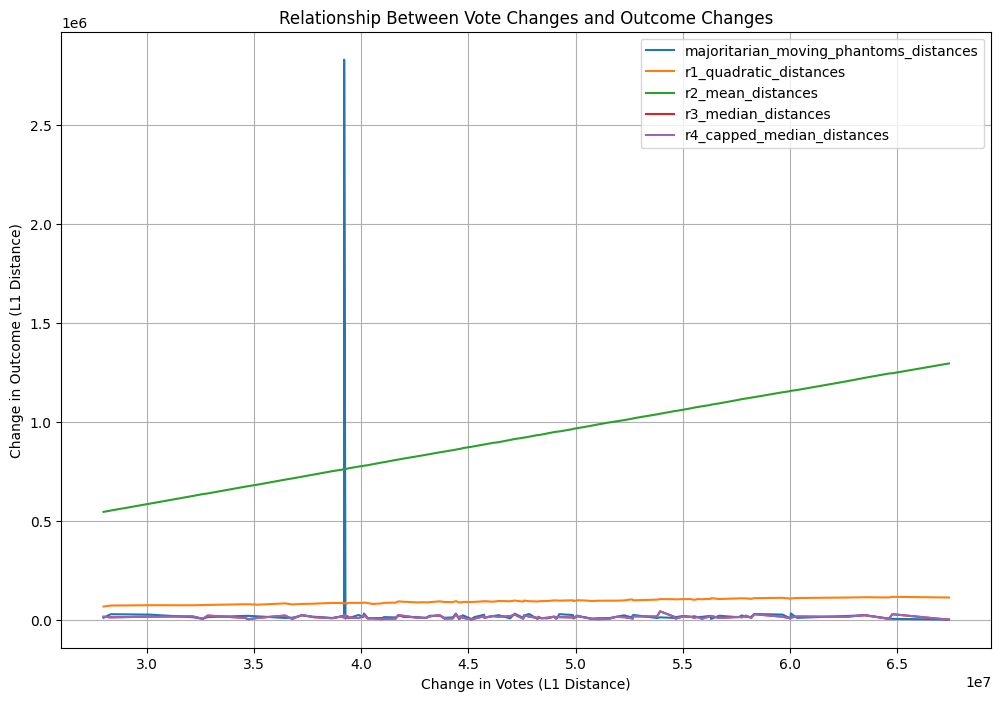

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_robustness_ordered(robustness_df):
    """Plot the relationship between vote changes and outcome changes after ordering by vote change."""
    # Replace 0 values with the column mean in the specified columns
    columns_to_replace = [
        'majoritarian_moving_phantoms_distances', 
        'r1_quadratic_distances', 
        'r2_mean_distances', 
        'r3_median_distances',
        'r4_capped_median_distances'
    ]
   

    # Sort by changed_vote_l1_distances
    robustness_df = robustness_df.sort_values(by='changed_vote_l1_distances').reset_index(drop=True)

    # Plot each voting rule's outcome change against the changed vote L1 distance
    plt.figure(figsize=(12, 8))
    
    for method in columns_to_replace:
        plt.plot(robustness_df['changed_vote_l1_distances'], robustness_df[method], label=method)

    plt.xlabel('Change in Votes (L1 Distance)')
    plt.ylabel('Change in Outcome (L1 Distance)')
    plt.title('Relationship Between Vote Changes and Outcome Changes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming robustness_df is your DataFrame with the results
plot_robustness_ordered(robustness_results)


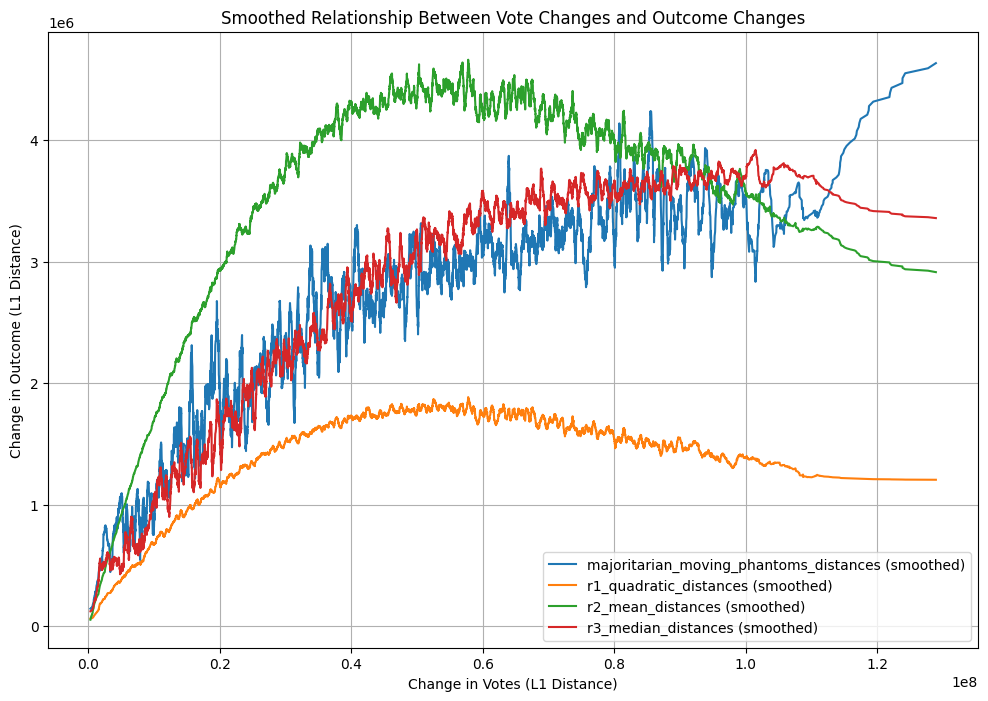

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

def plot_robustness_ordered(robustness_df, window_length=100, polyorder=2):
    """Plot the relationship between vote changes and outcome changes after applying Savitzky-Golay smoothing."""
    # Replace 0 values with the column mean in the specified columns
    columns_to_replace = [
        'majoritarian_moving_phantoms_distances', 
        'r1_quadratic_distances', 
        'r2_mean_distances', 
        'r3_median_distances'
    ]
   
    # Sort by changed_vote_l1_distances
    robustness_df = robustness_df.sort_values(by='changed_vote_l1_distances').reset_index(drop=True)

    # Apply smoothing to the voting rule columns using Savitzky-Golay filter
    smoothed_results = {}
    
    for method in columns_to_replace:
        smoothed_results[method] = savgol_filter(robustness_df[method], window_length=window_length, polyorder=polyorder)

    # Plot each voting rule's outcome change against the smoothed changed vote L1 distance
    plt.figure(figsize=(12, 8))
    
    for method in columns_to_replace:
        plt.plot(robustness_df['changed_vote_l1_distances'], smoothed_results[method], label=f"{method} (smoothed)")

    plt.xlabel('Change in Votes (L1 Distance)')
    plt.ylabel('Change in Outcome (L1 Distance)')
    plt.title('Smoothed Relationship Between Vote Changes and Outcome Changes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming robustness_df is your DataFrame with the results
plot_robustness_ordered(robustness_results)


# Evaluate Bribery Cost

In [4]:
#bribery_results = eval_metrics.evaluate_bribery(num_rounds)
bribery_constant_desired_increase_results = eval_metrics.evaluate_bribery(num_rounds,1)
bribery_constant_desired_increase_results.to_csv(os.path.join(output_dir, 'bribery_constant_desired_increase_results.csv'), index=False)
print("Bribery Cost Results:")
bribery_constant_desired_increase_results.head(100)

For project 0 and voting rule r4_capped_median, the bribery cost is infinite
For project 2 and voting rule r4_capped_median, the bribery cost is infinite
For project 3 and voting rule r4_capped_median, the bribery cost is infinite
For project 4 and voting rule r4_capped_median, the bribery cost is infinite
For project 6 and voting rule r4_capped_median, the bribery cost is infinite
For project 8 and voting rule r4_capped_median, the bribery cost is infinite
For project 10 and voting rule r4_capped_median, the bribery cost is infinite
For project 11 and voting rule r4_capped_median, the bribery cost is infinite
For project 1 and voting rule r4_capped_median, the bribery cost is infinite
For project 2 and voting rule r4_capped_median, the bribery cost is infinite
For project 3 and voting rule r4_capped_median, the bribery cost is infinite
For project 4 and voting rule r4_capped_median, the bribery cost is infinite
For project 5 and voting rule r4_capped_median, the bribery cost is infini

,round,desired_increase,majoritarian_moving_phantoms_bribery_cost,r1_quadratic_bribery_cost,r2_mean_bribery_cost,r3_median_bribery_cost,r4_capped_median_bribery_cost
0,1,1,1.252263,2.793509,1.059607,0.770623,0.770623
1,2,1,0.864790,2.044048,0.864790,0.707555,0.707555
2,3,1,1.483198,4.719267,1.483198,1.232199,1.232199
3,4,1,1.937719,3.629006,1.287712,1.053582,1.053582
4,5,1,1.073092,2.633952,1.073092,0.780430,0.877984
...,...,...,...,...,...,...,...
95,96,1,0.889719,2.588273,0.889719,0.727952,0.727952
96,97,1,1.599556,3.851449,1.366643,1.118162,1.118162
97,98,1,1.166922,3.500765,1.303674,0.907606,0.907606
98,99,1,1.106069,3.710121,1.316495,0.967811,0.967811


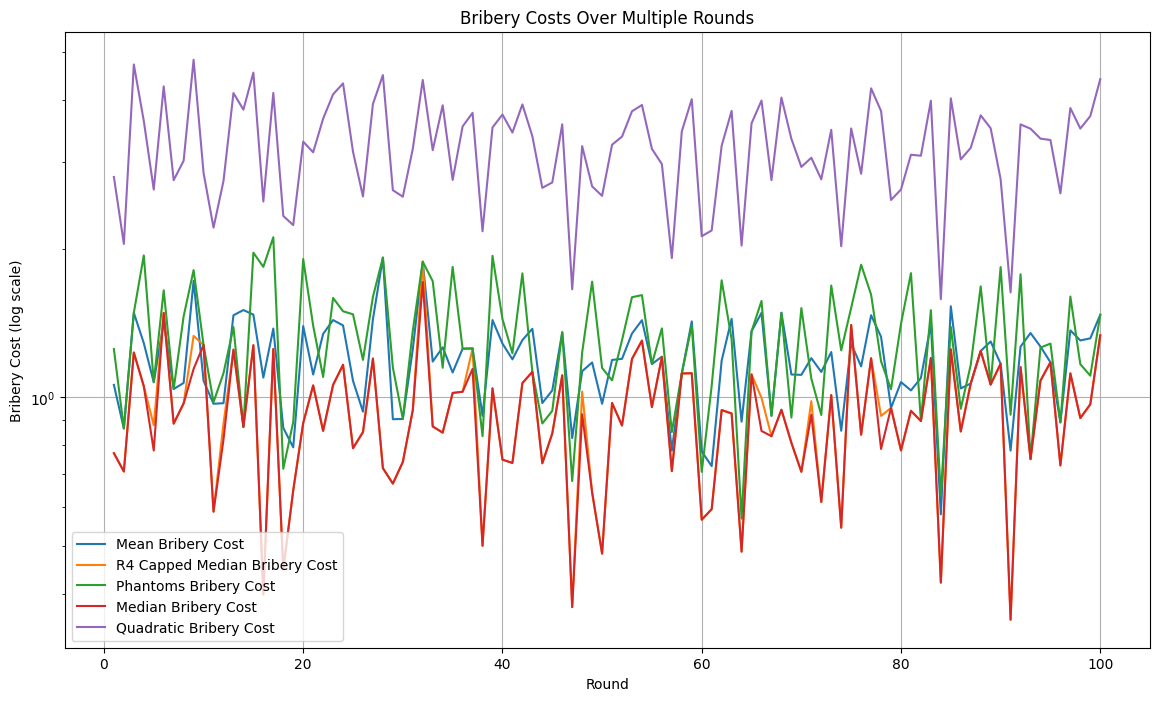

In [6]:
import matplotlib.pyplot as plt

# Plot the results with a logarithmic y-axis
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['round'], df['r2_mean_bribery_cost'], label='Mean Bribery Cost')

    plt.plot(df['round'], df['r4_capped_median_bribery_cost'], label='R4 Capped Median Bribery Cost')
    plt.plot(df['round'], df['majoritarian_moving_phantoms_bribery_cost'], label='Phantoms Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['round'], df['r3_median_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['round'], df['r1_quadratic_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('Round')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Multiple Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_constant_desired_increase_results)

In [8]:
summary_stats = bribery_constant_desired_increase_results[['r1_quadratic_bribery_cost', 'r2_mean_bribery_cost', 'r3_median_bribery_cost',"majoritarian_moving_phantoms_bribery_cost",'r4_capped_median_bribery_cost']].describe()
print(summary_stats)

       r1_quadratic_bribery_cost  r2_mean_bribery_cost  \
count                 100.000000            100.000000   
mean                    3.239740              1.193338   
std                     0.729320              0.240679   
min                     1.580524              0.579525   
25%                     2.737229              1.041685   
50%                     3.270137              1.192003   
75%                     3.795607              1.361957   
max                     4.825523              1.918288   

       r3_median_bribery_cost  majoritarian_moving_phantoms_bribery_cost  \
count              100.000000                                 100.000000   
mean                 0.926907                                   1.314827   
std                  0.259908                                   0.358477   
min                  0.354564                                   0.568134   
25%                  0.749265                                   1.059962   
50%                  

# VEV

In [2]:
vev_results = eval_metrics.evaluate_vev()
vev_results.to_csv(os.path.join(output_dir, 'vev_results.csv'), index=False)

vev_results.head(100)

,round,voting_rule,max_vev
0,1,majoritarian_moving_phantoms,4.317496
1,1,r1_quadratic,2.032121
2,1,r2_mean,5.900654
3,1,r3_median,3.163268
4,1,r4_capped_median,3.272974
...,...,...,...
95,20,majoritarian_moving_phantoms,2.847077
96,20,r1_quadratic,2.171136
97,20,r2_mean,5.927716
98,20,r3_median,2.726122
